In [ ]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For data visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv('/content/delhi_aqi.csv')



#Display the first few rows to verify it loaded correctly
df.head()

date       co     no     no2     o3    so2   pm2_5    pm10  \
0  2020-11-25 01:00:00  2616.88   2.18   70.60  13.59  38.62  364.61  411.73   
1  2020-11-25 02:00:00  3631.59  23.25   89.11   0.33  54.36  420.96  486.21   
2  2020-11-25 03:00:00  4539.49  52.75  100.08   1.11  68.67  463.68  541.95   
3  2020-11-25 04:00:00  4539.49  50.96  111.04   6.44  78.20  454.81  534.00   
4  2020-11-25 05:00:00  4379.27  42.92  117.90  17.17  87.74  448.14  529.19   

     nh3  
0  28.63  
1  41.04  
2  49.14  
3  48.13  
4  46.61

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  checking column info
df.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

In [ ]:
# checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
# Statiscal summary of the dataset
df.describe()

co            no           no2            o3           so2  \
count  18776.000000  18776.000000  18776.000000  18776.000000  18776.000000   
mean    2929.228628     33.660702     66.221299     60.346239     66.693633   
std     2854.523506     62.127118     48.527492     80.464932     49.439191   
min      260.350000      0.000000      4.280000      0.000000      5.250000   
25%     1068.120000      0.680000     33.930000      0.340000     34.810000   
50%     1842.500000      5.250000     54.150000     27.180000     52.930000   
75%     3685.000000     35.760000     83.630000     92.980000     82.020000   
max    21148.680000    500.680000    460.620000    801.090000    579.830000   

              pm2_5          pm10           nh3  
count  18776.000000  18776.000000  18776.000000  
mean     238.130309    300.092966     25.109815  
std      226.533625    267.165827     26.402108  
min       11.830000     15.070000      0.000000  
25%       84.440000    118.797500      9.630000  
50%      157.445000    209.705000     17.480000  
75%      313.000000    387.965000     30.400000  
max     1708.090000   1969.930000    287.770000

In [ ]:
#checking the dataset types
df.dtypes


date      object
co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object

In [ ]:
#dataset shape
df.shape

(18776, 9)

In [ ]:
# renaming the dataset
df.rename(columns = {'co':'Carbon Monoxide,μg/m3','no':'Nitrogen Oxide,μg/m3','no2':'Nitrogen Dioxide,μg/m3','o3':'Ozone,μg/m3',
          'so2':'Sulphur Dioxide,μg/m3','pm2_5':'PM2.5,μg/m3','pm10':'PM10,μg/m3','nh3':'Ammonia,μg/m3'},inplace = True)

In [ ]:
df.head(5)

date  Carbon Monoxide,μg/m3  Nitrogen Oxide,μg/m3  \
0  2020-11-25 01:00:00                2616.88                  2.18   
1  2020-11-25 02:00:00                3631.59                 23.25   
2  2020-11-25 03:00:00                4539.49                 52.75   
3  2020-11-25 04:00:00                4539.49                 50.96   
4  2020-11-25 05:00:00                4379.27                 42.92   

   Nitrogen Dioxide,μg/m3  Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  \
0                   70.60        13.59                  38.62       364.61   
1                   89.11         0.33                  54.36       420.96   
2                  100.08         1.11                  68.67       463.68   
3                  111.04         6.44                  78.20       454.81   
4                  117.90        17.17                  87.74       448.14   

   PM10,μg/m3  Ammonia,μg/m3  
0      411.73          28.63  
1      486.21          41.04  
2      541.95          49.14  
3      534.00          48.13  
4      529.19          46.61

In [ ]:
#checking for missing data
df.isnull().sum()


date                      0
Carbon Monoxide,μg/m3     0
Nitrogen Oxide,μg/m3      0
Nitrogen Dioxide,μg/m3    0
Ozone,μg/m3               0
Sulphur Dioxide,μg/m3     0
PM2.5,μg/m3               0
PM10,μg/m3                0
Ammonia,μg/m3             0
dtype: int64

In [ ]:
df.tail()

date  Carbon Monoxide,μg/m3  Nitrogen Oxide,μg/m3  \
18771  2023-01-24 04:00:00                1762.39                  4.64   
18772  2023-01-24 05:00:00                1735.69                  6.82   
18773  2023-01-24 06:00:00                1922.61                  8.16   
18774  2023-01-24 07:00:00                1361.85                  9.05   
18775  2023-01-24 08:00:00                1134.87                  8.61   

       Nitrogen Dioxide,μg/m3  Ozone,μg/m3  Sulphur Dioxide,μg/m3  \
18771                   37.01        33.26                  30.52   
18772                   34.96        46.49                  34.33   
18773                   40.10        56.51                  43.39   
18774                   52.78        71.53                 100.14   
18775                   56.89        80.11                 110.63   

       PM2.5,μg/m3  PM10,μg/m3  Ammonia,μg/m3  
18771       231.15      289.84           6.27  
18772       225.08      280.52           9.12  
18773       242.49      296.07          12.54  
18774       165.67      191.82           7.47  
18775       123.76      140.26           5.51

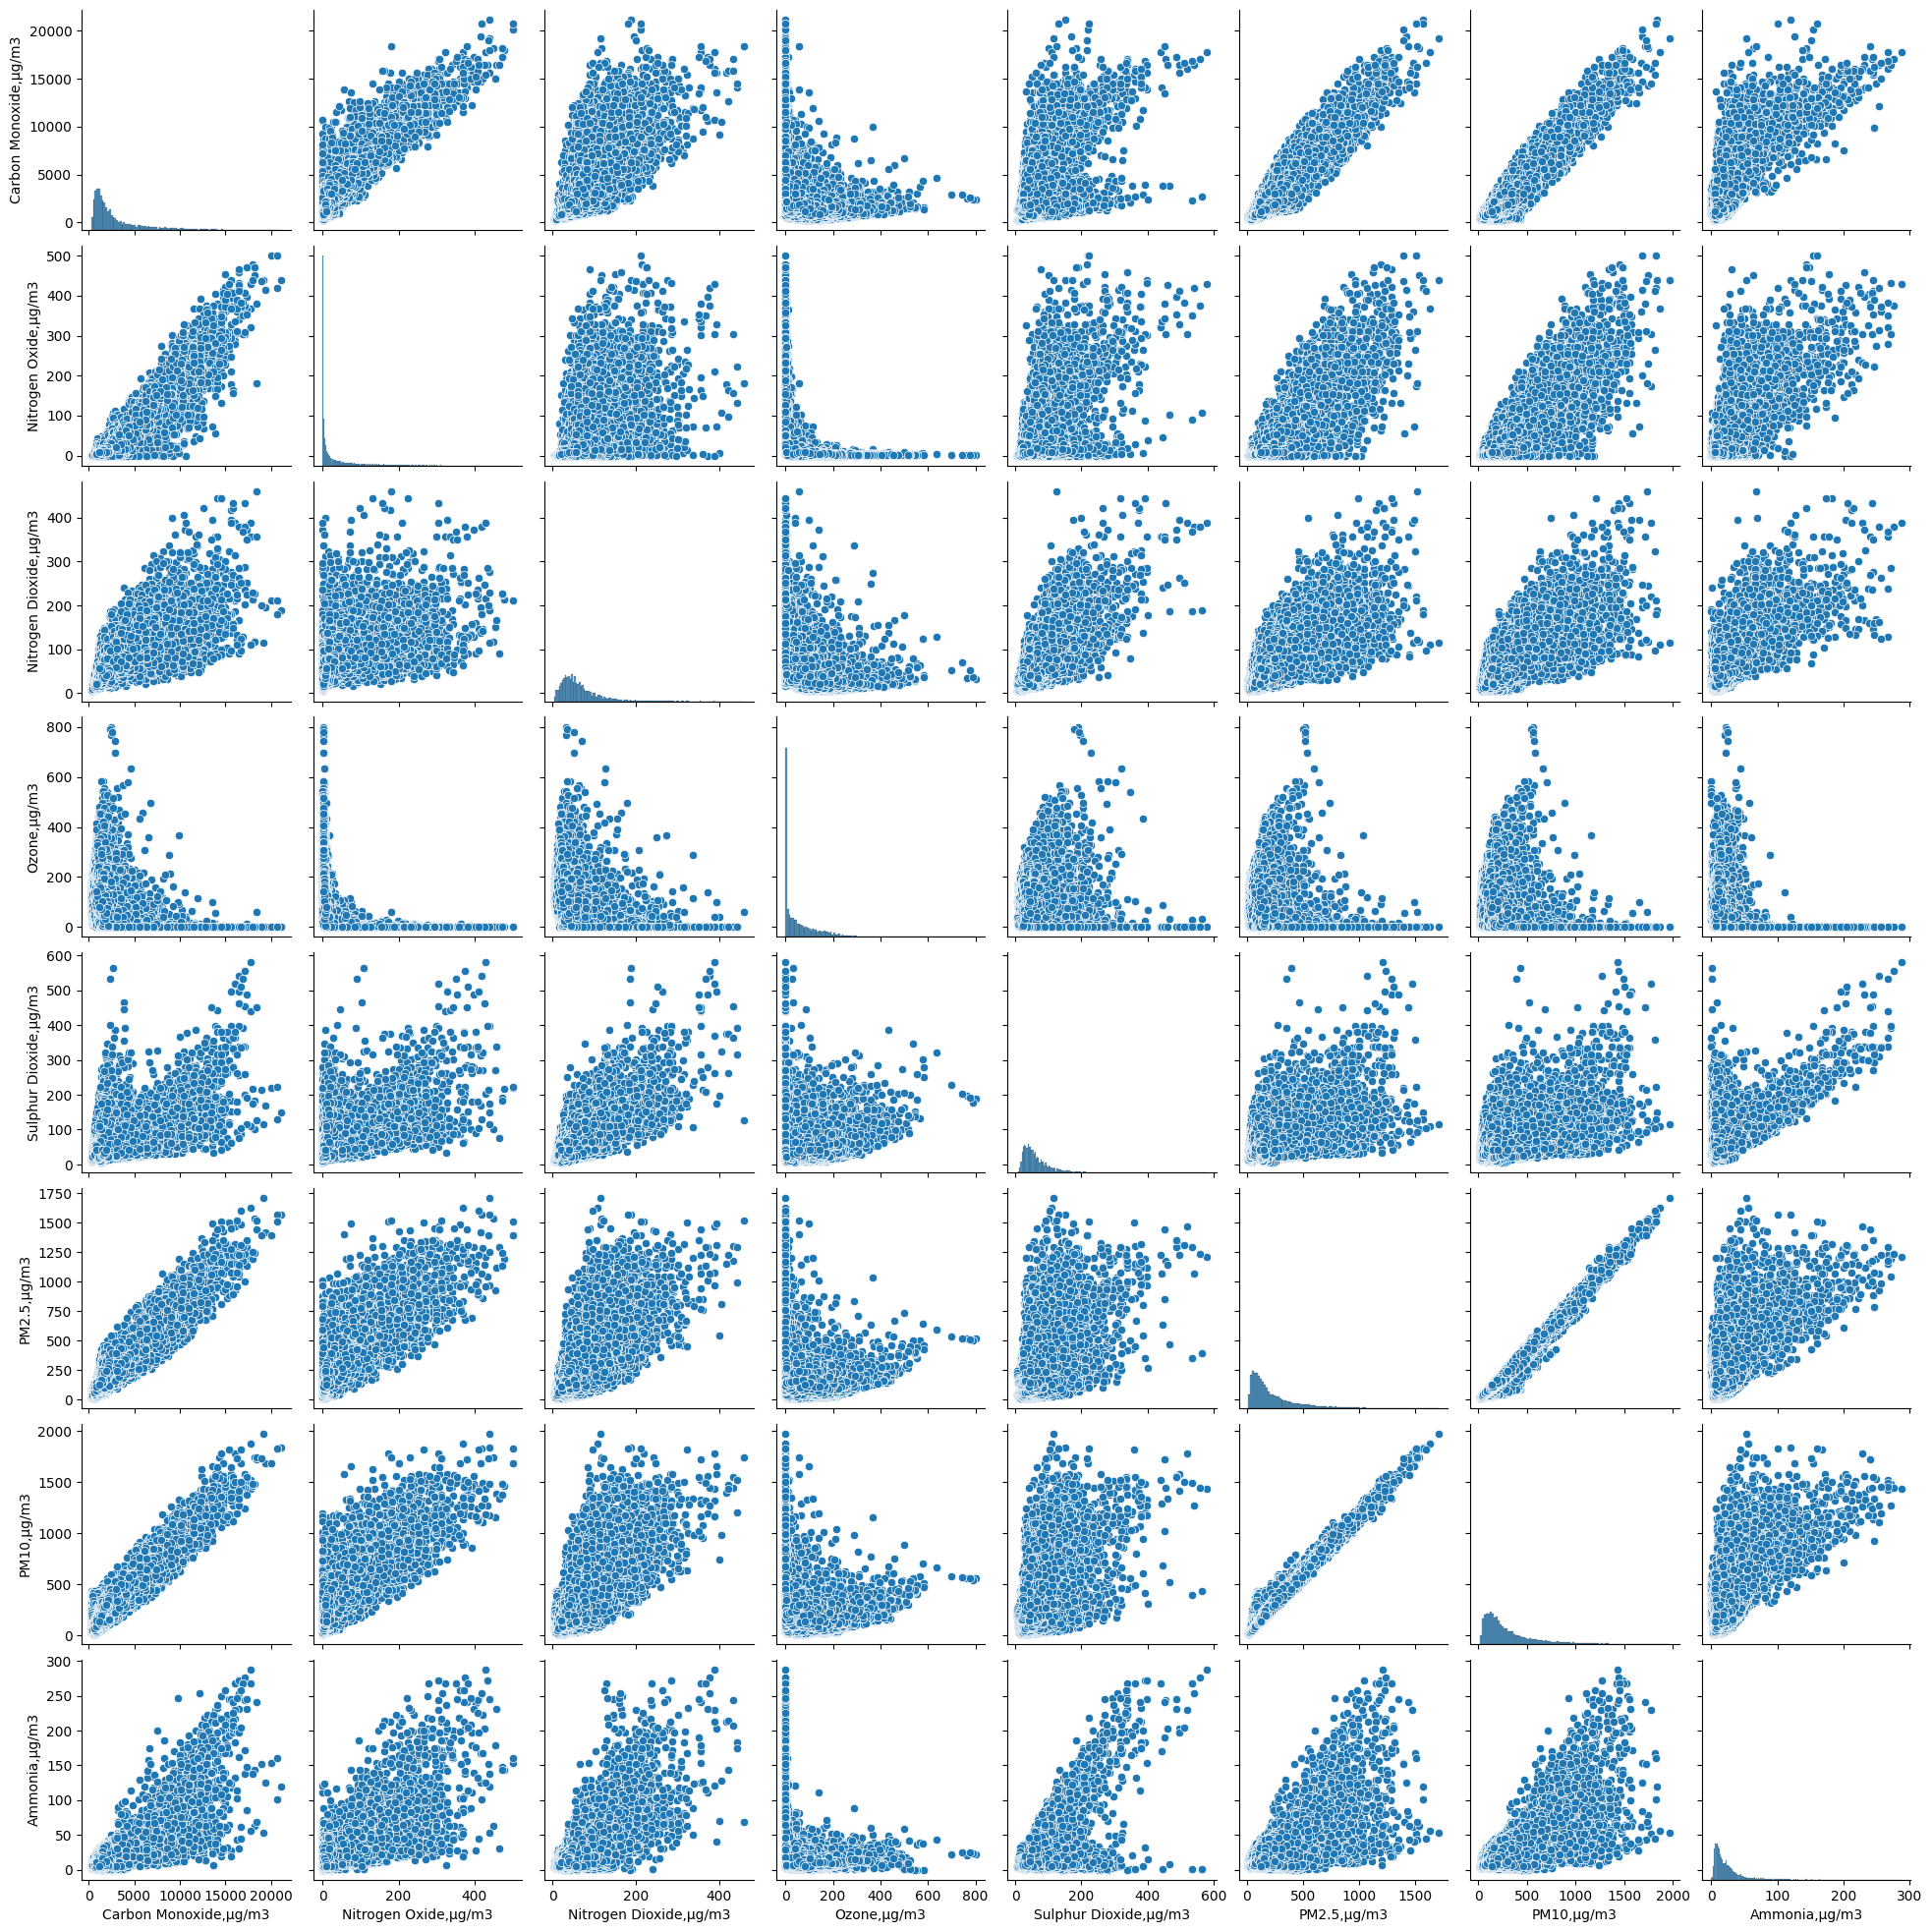

In [ ]:
#checking the relationship between pollutant

sns.pairplot(df,hue = None,palette="cubehelix")

In [ ]:
#splitting into year, month, days,


import pandas as pd

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract Year, Month, Week, Day Name, Hour, and Day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week  # Updated method for Pandas 1.1+
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour  # No need for lambda function
df['day'] = df['date'].dt.day

# Display first 5 rows to verify
df.head()


date  Carbon Monoxide,μg/m3  Nitrogen Oxide,μg/m3  \
0 2020-11-25 01:00:00                2616.88                  2.18   
1 2020-11-25 02:00:00                3631.59                 23.25   
2 2020-11-25 03:00:00                4539.49                 52.75   
3 2020-11-25 04:00:00                4539.49                 50.96   
4 2020-11-25 05:00:00                4379.27                 42.92   

   Nitrogen Dioxide,μg/m3  Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  \
0                   70.60        13.59                  38.62       364.61   
1                   89.11         0.33                  54.36       420.96   
2                  100.08         1.11                  68.67       463.68   
3                  111.04         6.44                  78.20       454.81   
4                  117.90        17.17                  87.74       448.14   

   PM10,μg/m3  Ammonia,μg/m3  year  month  week   day_name  hour  day  
0      411.73          28.63  2020     11    48  Wednesday     1   25  
1      486.21          41.04  2020     11    48  Wednesday     2   25  
2      541.95          49.14  2020     11    48  Wednesday     3   25  
3      534.00          48.13  2020     11    48  Wednesday     4   25  
4      529.19          46.61  2020     11    48  Wednesday     5   25

In [ ]:
df1 = df.drop(['date'],axis = 1)


In [ ]:
# categorizing into seasons

seasons = { 1:'Winter', 2:'Winter', 3:'Summer', 4:'Summer', 5:'Summer',
           6:'Monsoon', 7:'Monsoon', 8:'Monsoon',9:'Monsoon', 10:'Autumn', 11:'Autumn',12:'Winter',}
df1['seasons']=df1['month'].map(seasons)
df1.head()


Carbon Monoxide,μg/m3  Nitrogen Oxide,μg/m3  Nitrogen Dioxide,μg/m3  \
0                2616.88                  2.18                   70.60   
1                3631.59                 23.25                   89.11   
2                4539.49                 52.75                  100.08   
3                4539.49                 50.96                  111.04   
4                4379.27                 42.92                  117.90   

   Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  Ammonia,μg/m3  \
0        13.59                  38.62       364.61      411.73          28.63   
1         0.33                  54.36       420.96      486.21          41.04   
2         1.11                  68.67       463.68      541.95          49.14   
3         6.44                  78.20       454.81      534.00          48.13   
4        17.17                  87.74       448.14      529.19          46.61   

   year  month  week   day_name  hour  day seasons  
0  2020     11    48  Wednesday     1   25  Autumn  
1  2020     11    48  Wednesday     2   25  Autumn  
2  2020     11    48  Wednesday     3   25  Autumn  
3  2020     11    48  Wednesday     4   25  Autumn  
4  2020     11    48  Wednesday     5   25  Autumn

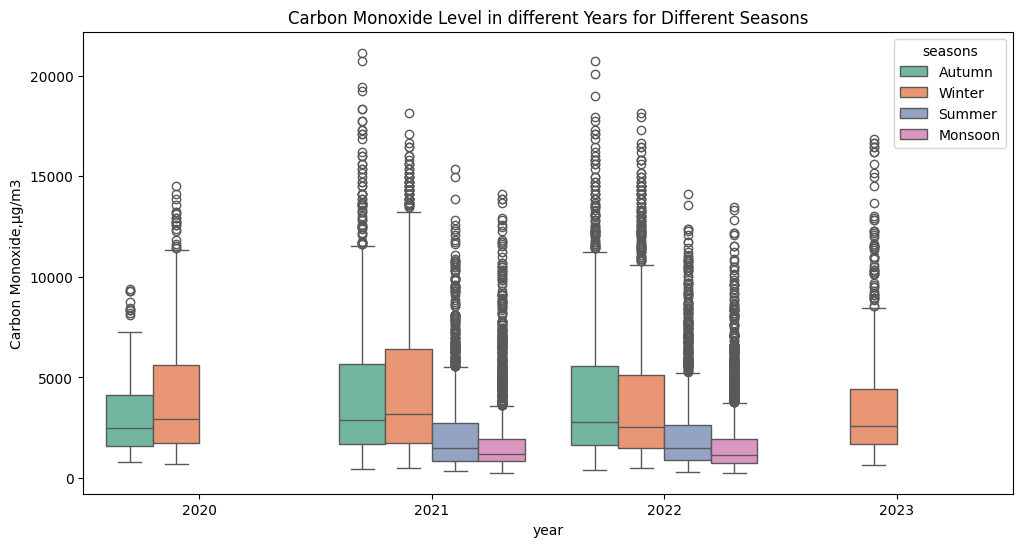

In [ ]:
#Pollutants Concentration in Different Years for Different Seasons

fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Carbon Monoxide,μg/m3", hue="seasons",palette="Set2")
plt.title("Carbon Monoxide Level in different Years for Different Seasons")
plt.show()

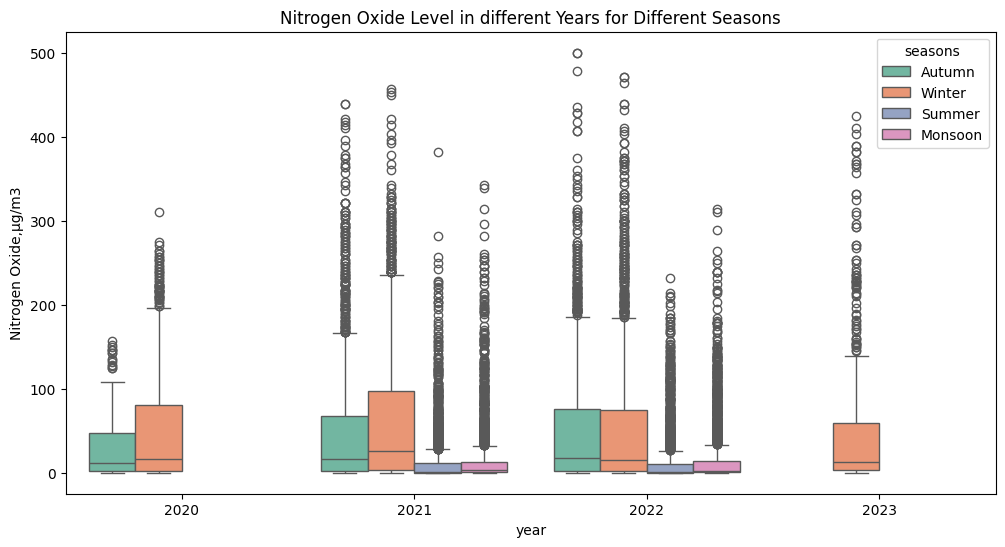

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Nitrogen Oxide,μg/m3", hue="seasons",palette="Set2")
plt.title("Nitrogen Oxide Level in different Years for Different Seasons")
plt.show()

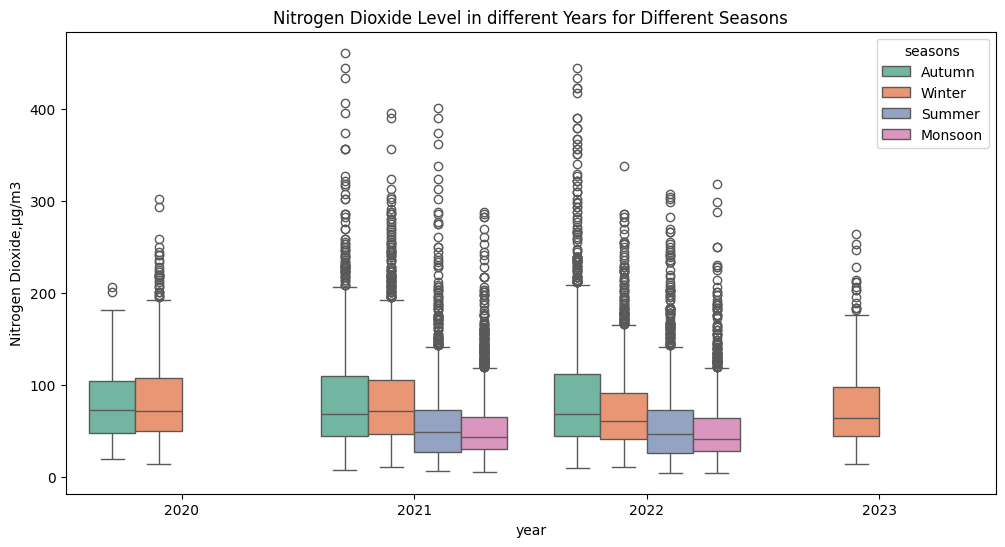

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Nitrogen Dioxide,μg/m3", hue="seasons",palette="Set2")
plt.title("Nitrogen Dioxide Level in different Years for Different Seasons")
plt.show()

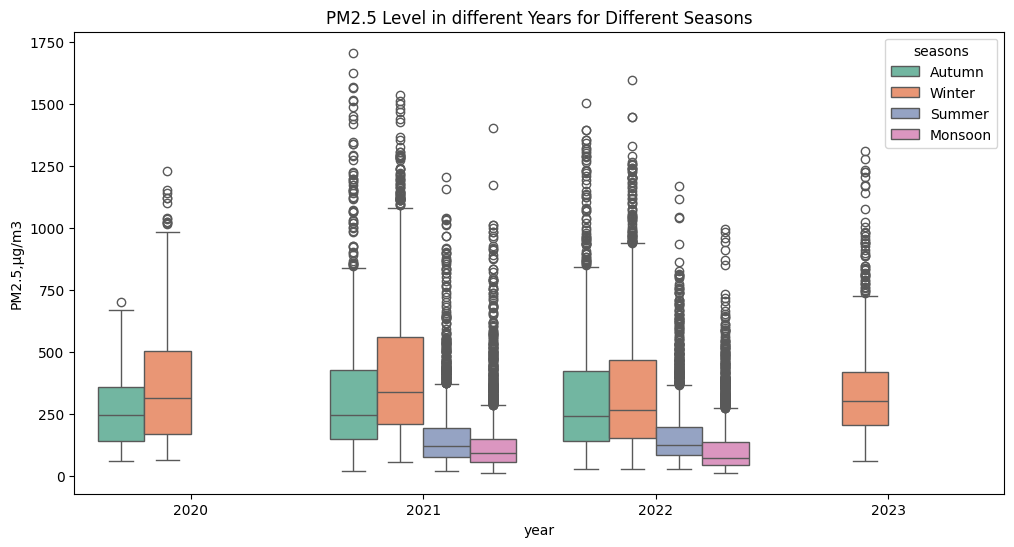

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="PM2.5,μg/m3", hue="seasons",palette="Set2")
plt.title("PM2.5 Level in different Years for Different Seasons")
plt.show()

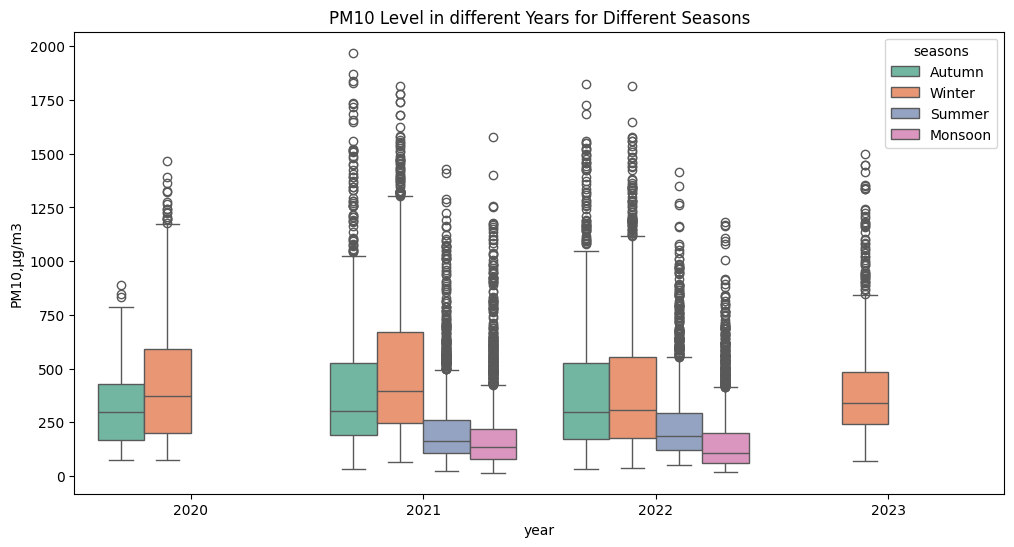

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="PM10,μg/m3", hue="seasons",palette="Set2")
plt.title("PM10 Level in different Years for Different Seasons")
plt.show()

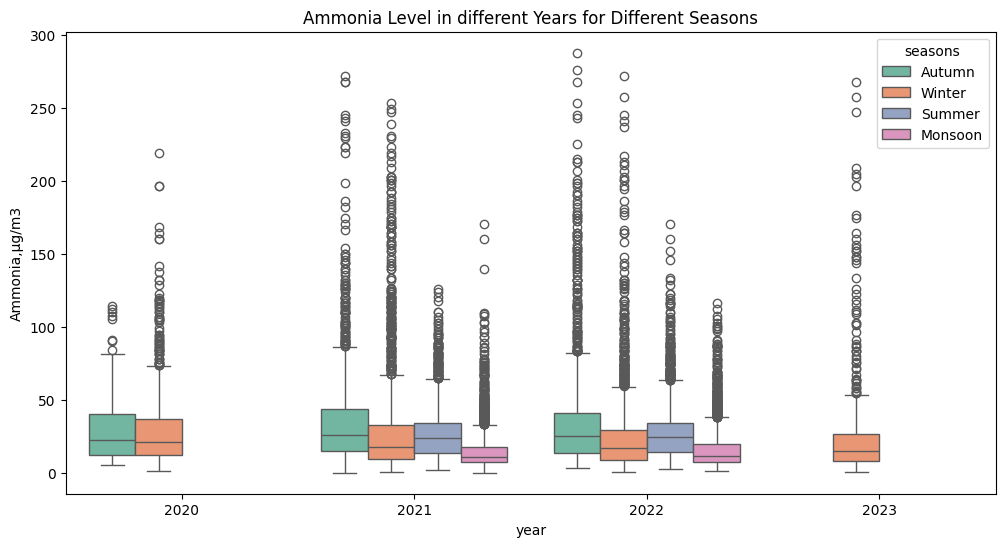

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Ammonia,μg/m3", hue="seasons",palette="Set2")
plt.title("Ammonia Level in different Years for Different Seasons")
plt.show()

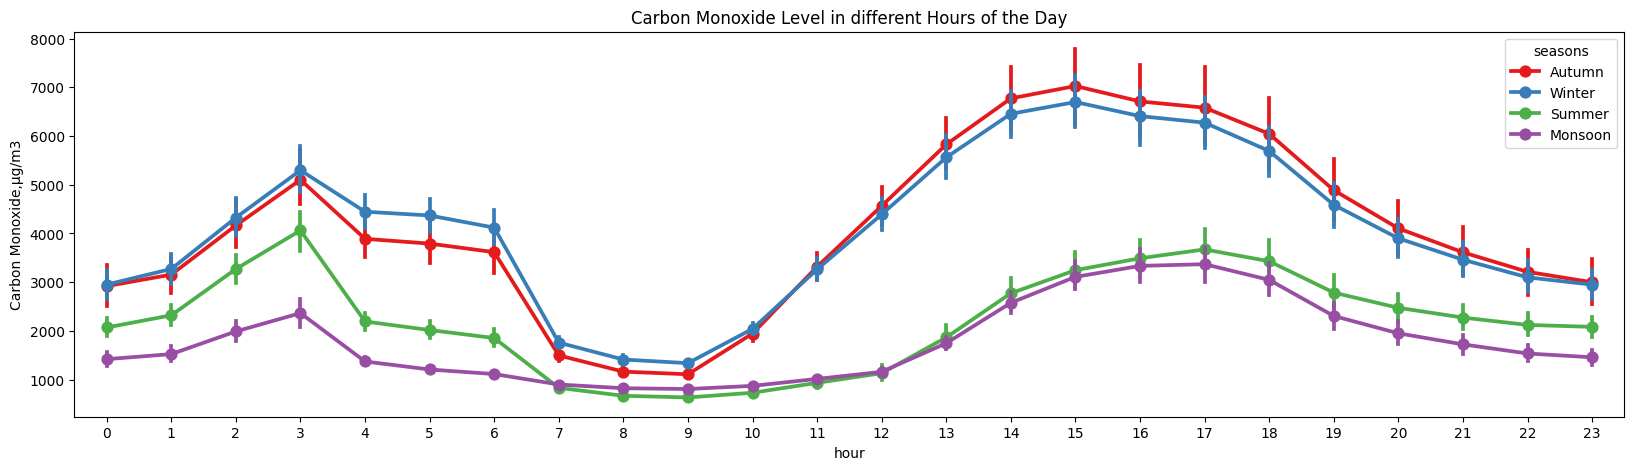

In [ ]:
#Pollutants Concentration in Different Hours of the Day for Different Seasons¶
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Carbon Monoxide,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Carbon Monoxide Level in different Hours of the Day")
plt.show()


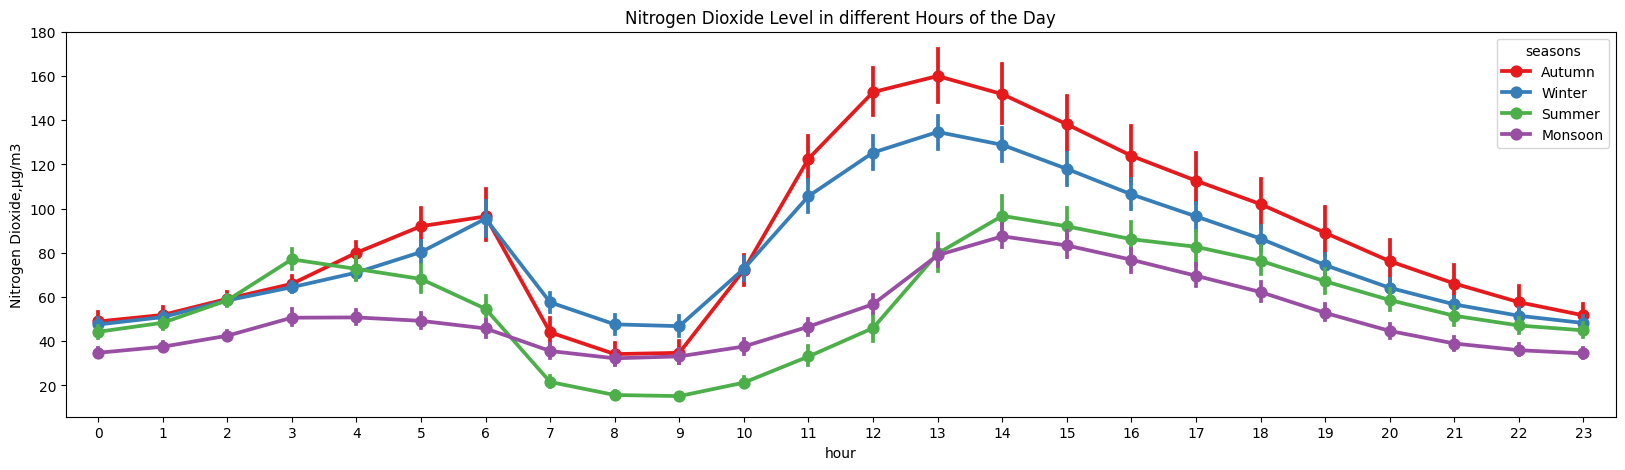

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Nitrogen Dioxide,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Nitrogen Dioxide Level in different Hours of the Day")
plt.show()

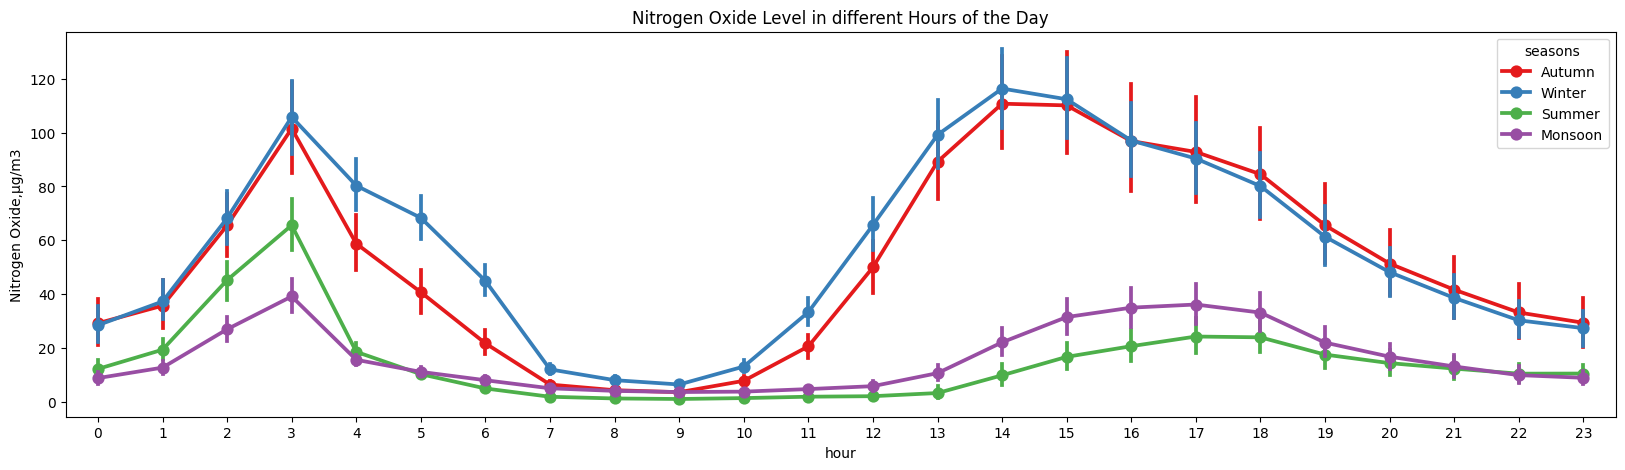

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Nitrogen Oxide,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Nitrogen Oxide Level in different Hours of the Day")
plt.show()

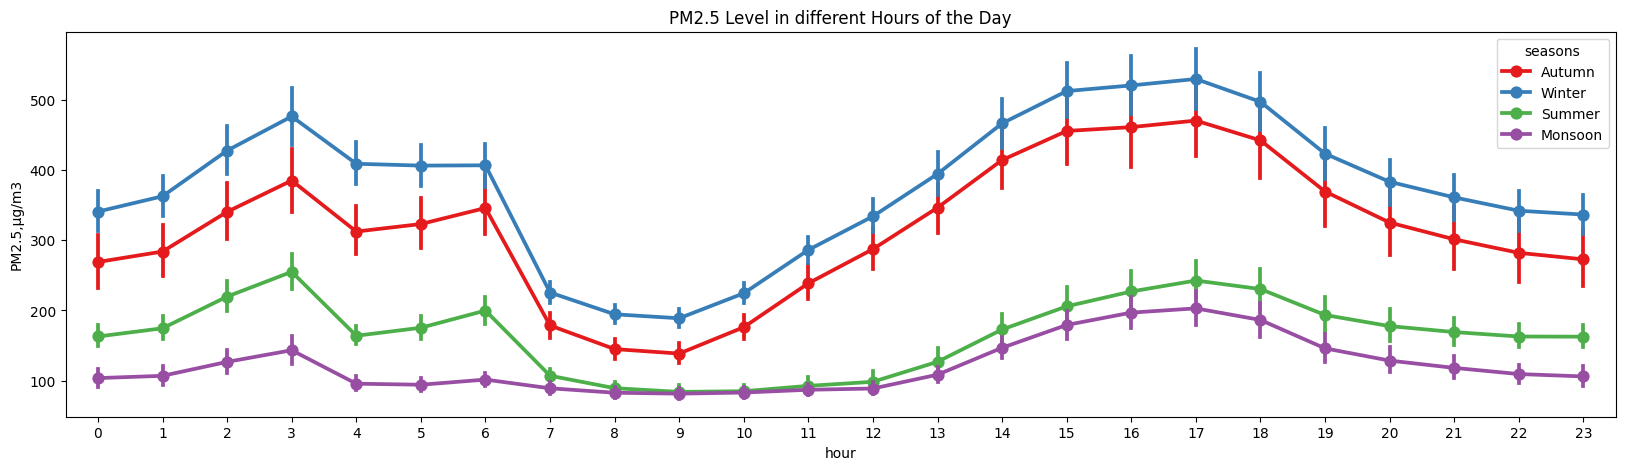

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="PM2.5,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("PM2.5 Level in different Hours of the Day")
plt.show()

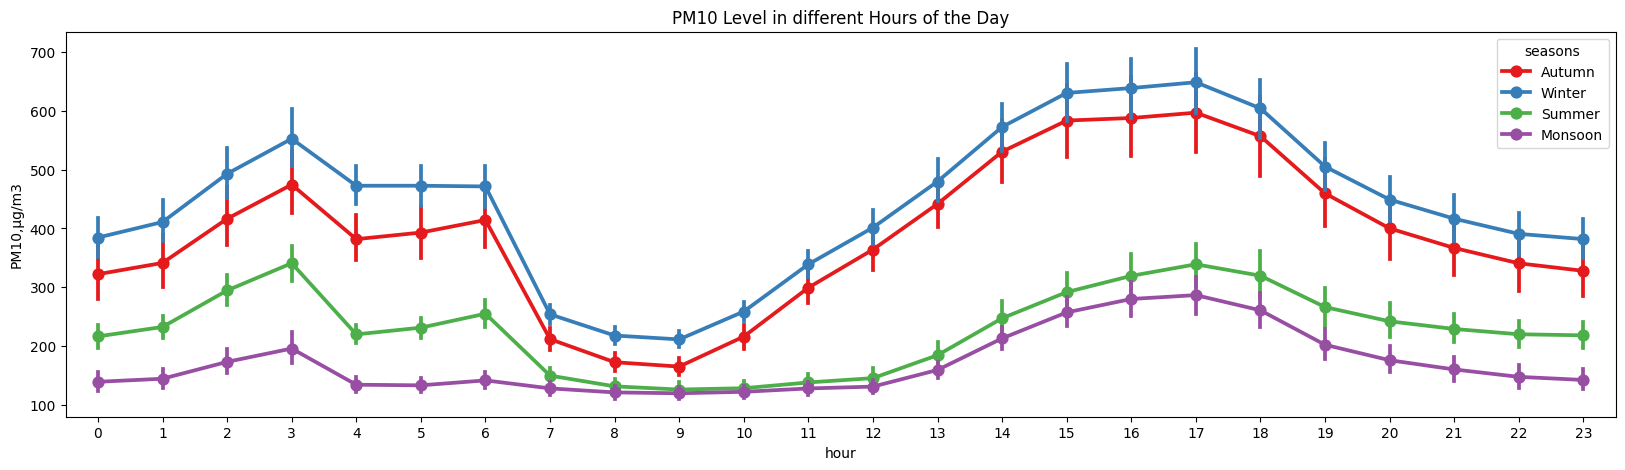

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="PM10,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("PM10 Level in different Hours of the Day")
plt.show()

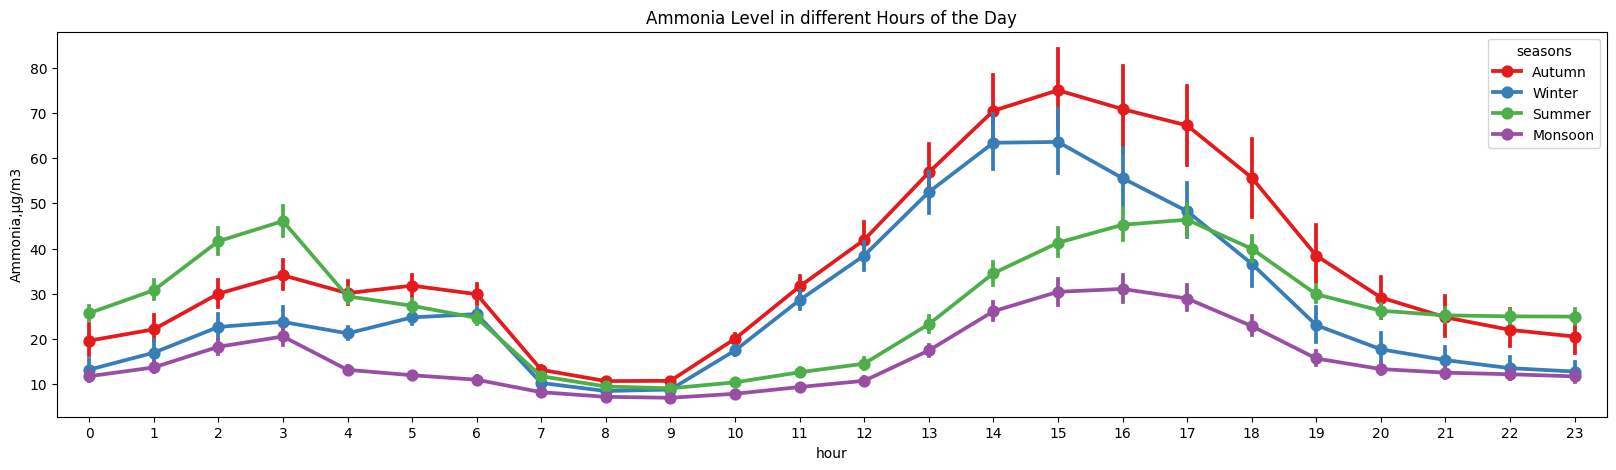

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Ammonia,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Ammonia Level in different Hours of the Day")
plt.show()

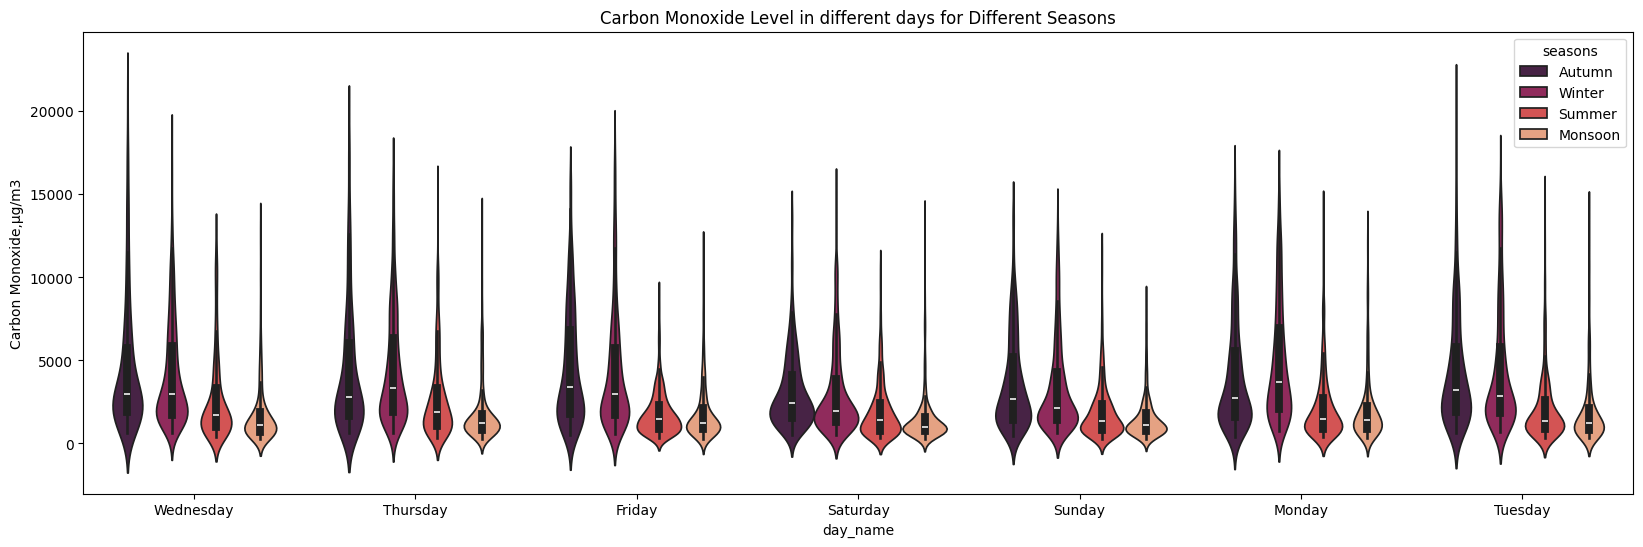

In [ ]:
#Pollutants Concentration in Different Days for Different Seasons
# Ensure the 'date' column is in datetime format
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="day_name", y="Carbon Monoxide,μg/m3", hue="seasons",palette="rocket")
plt.title("Carbon Monoxide Level in different days for Different Seasons")
plt.show()



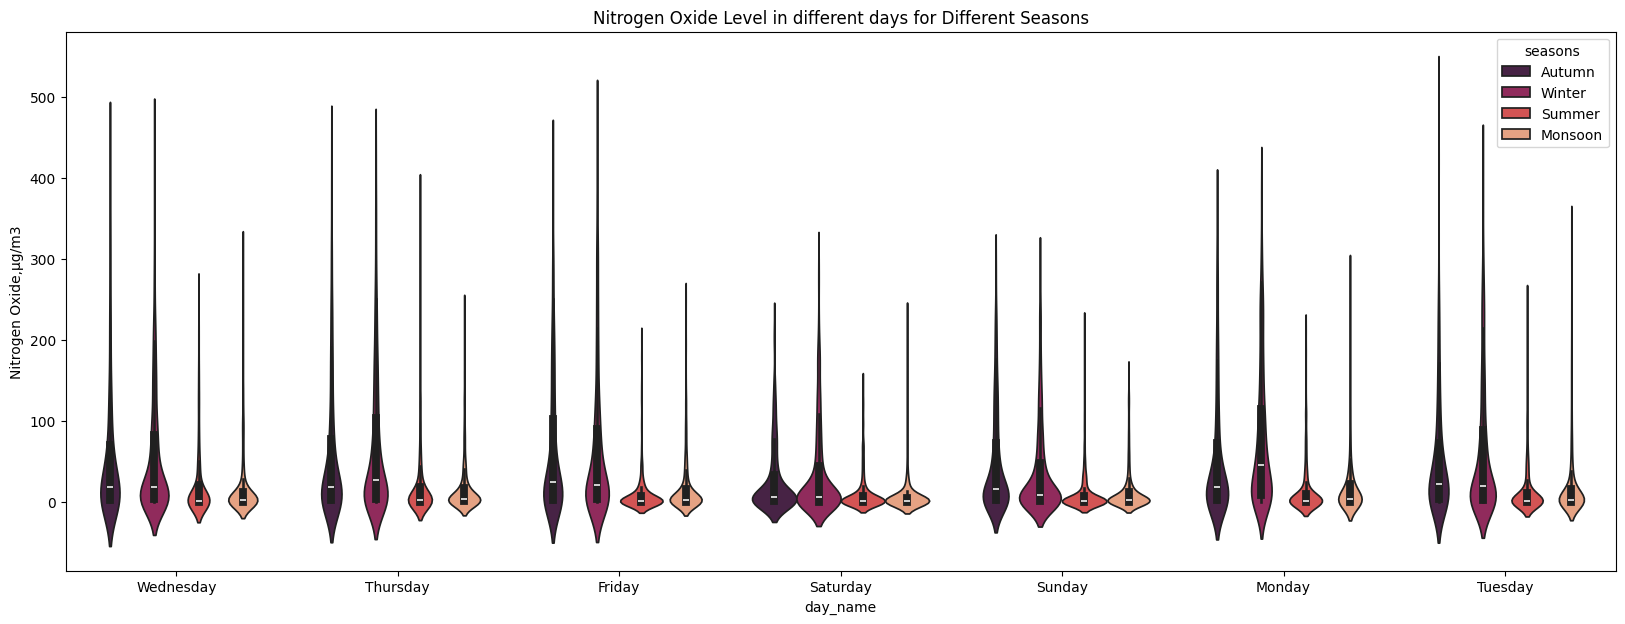

In [ ]:
fig, ax= plt.subplots(figsize=(20,7))
sns.violinplot(data=df1, x="day_name", y="Nitrogen Oxide,μg/m3", hue="seasons",palette="rocket")
plt.title("Nitrogen Oxide Level in different days for Different Seasons")
plt.show()

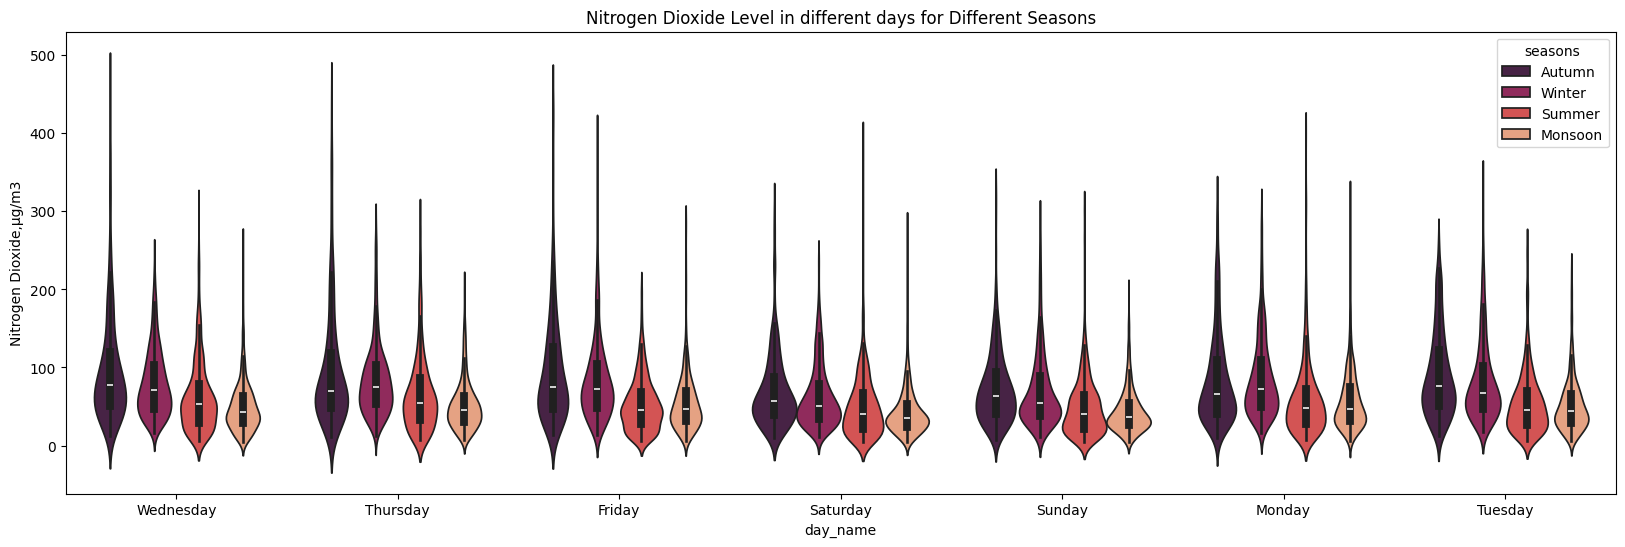

In [ ]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="day_name", y="Nitrogen Dioxide,μg/m3", hue="seasons",palette="rocket")
plt.title("Nitrogen Dioxide Level in different days for Different Seasons")
plt.show()

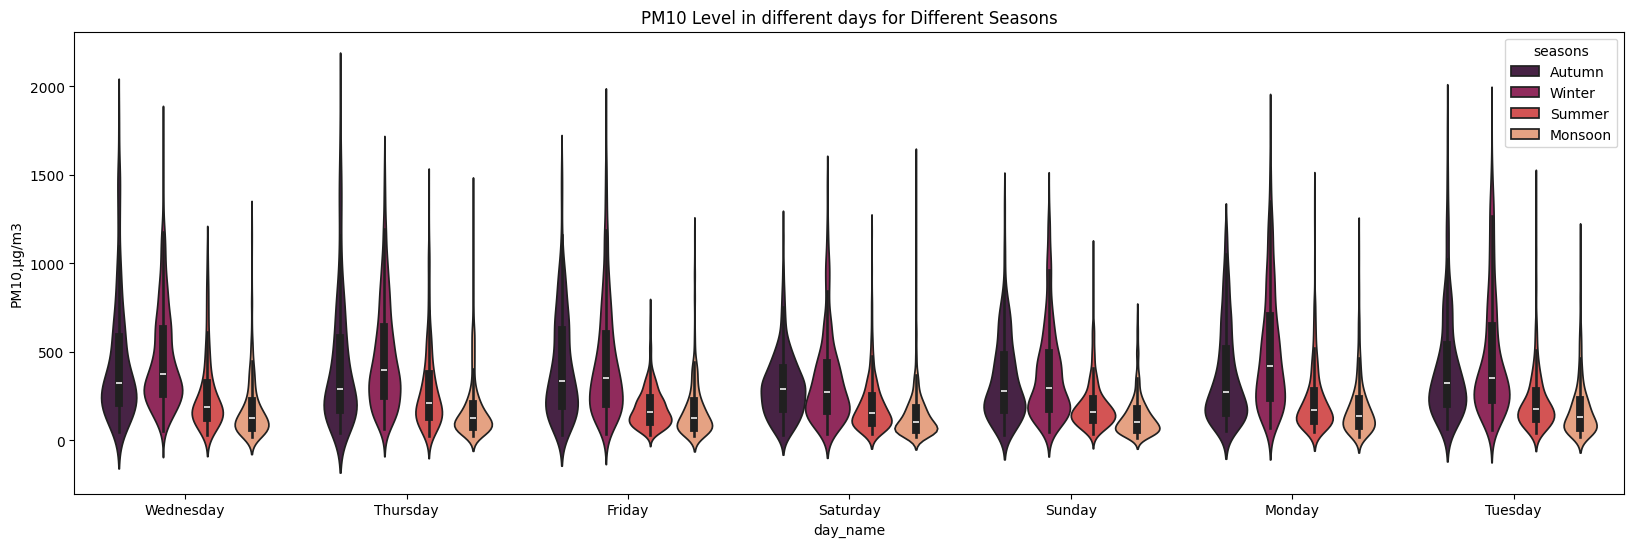

In [ ]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="day_name", y="PM10,μg/m3", hue="seasons",palette="rocket")
plt.title("PM10 Level in different days for Different Seasons")
plt.show()

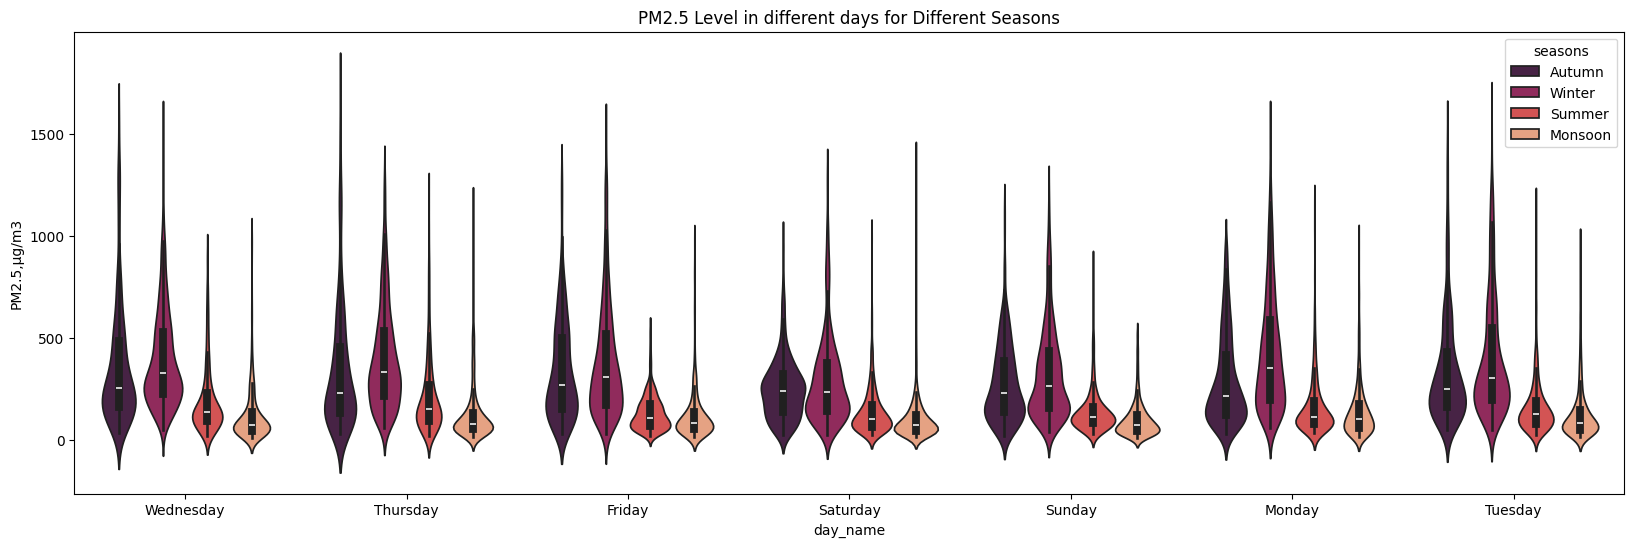

In [ ]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="day_name", y="PM2.5,μg/m3", hue="seasons",palette="rocket")
plt.title("PM2.5 Level in different days for Different Seasons")
plt.show()



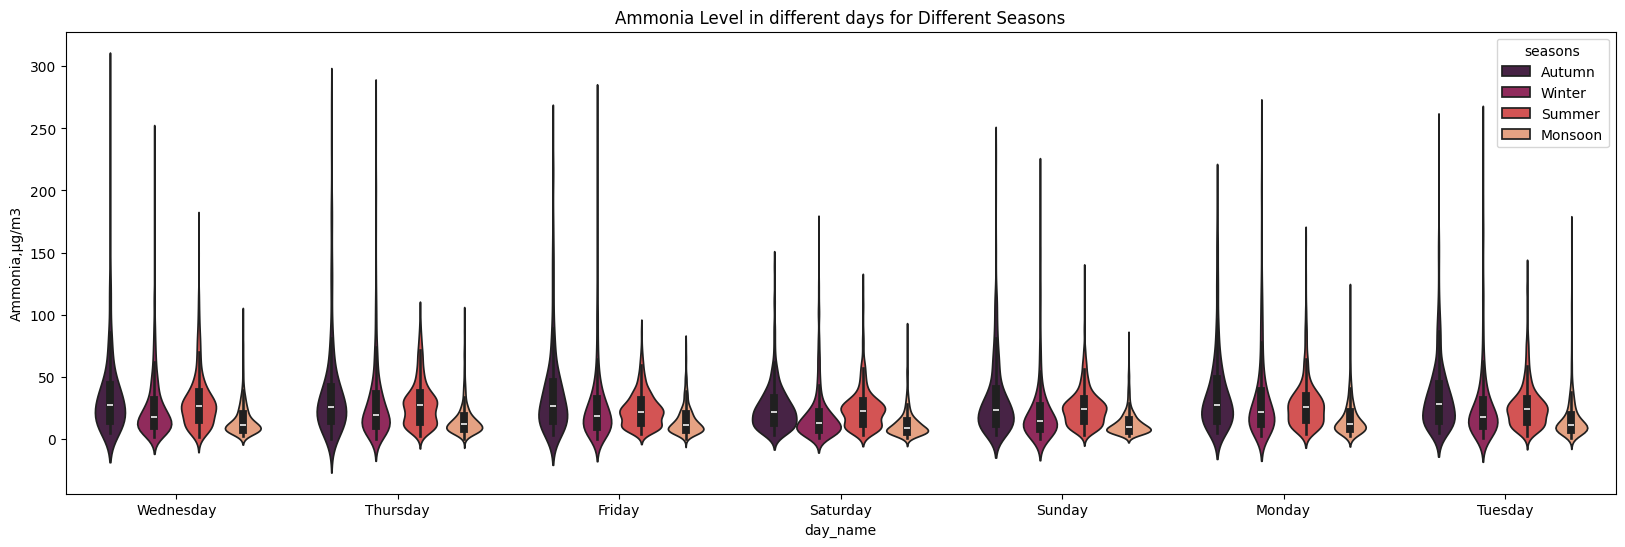

In [ ]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="day_name", y="Ammonia,μg/m3", hue="seasons",palette="rocket")
plt.title("Ammonia Level in different days for Different Seasons")
plt.show()

In [ ]:
df1['date'] = pd.to_datetime(df['date']).dt.date
df1['time'] = pd.to_datetime(df['date']).dt.time

In [ ]:
df1.head()

Carbon Monoxide,μg/m3  Nitrogen Oxide,μg/m3  Nitrogen Dioxide,μg/m3  \
0                2616.88                  2.18                   70.60   
1                3631.59                 23.25                   89.11   
2                4539.49                 52.75                  100.08   
3                4539.49                 50.96                  111.04   
4                4379.27                 42.92                  117.90   

   Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  Ammonia,μg/m3  \
0        13.59                  38.62       364.61      411.73          28.63   
1         0.33                  54.36       420.96      486.21          41.04   
2         1.11                  68.67       463.68      541.95          49.14   
3         6.44                  78.20       454.81      534.00          48.13   
4        17.17                  87.74       448.14      529.19          46.61   

   year  month  week   day_name  hour  day seasons        date      time  
0  2020     11    48  Wednesday     1   25  Autumn  2020-11-25  01:00:00  
1  2020     11    48  Wednesday     2   25  Autumn  2020-11-25  02:00:00  
2  2020     11    48  Wednesday     3   25  Autumn  2020-11-25  03:00:00  
3  2020     11    48  Wednesday     4   25  Autumn  2020-11-25  04:00:00  
4  2020     11    48  Wednesday     5   25  Autumn  2020-11-25  05:00:00

In [ ]:
AQIData = df1.groupby(['date'])[['Carbon Monoxide,μg/m3','Nitrogen Oxide,μg/m3','Nitrogen Dioxide,μg/m3','Ozone,μg/m3','Sulphur Dioxide,μg/m3','PM2.5,μg/m3','PM10,μg/m3','Ammonia,μg/m3']].mean()
AQIData['Carbon Monoxide,mg/m3'] = (AQIData['Carbon Monoxide,μg/m3']/1000).round(2)
AQIData= AQIData.drop(['Carbon Monoxide,μg/m3'],axis =1)
AQIData['NOx,μg/m3'] = AQIData['Nitrogen Oxide,μg/m3']+AQIData['Nitrogen Dioxide,μg/m3']
AQIData= AQIData.drop(['Nitrogen Oxide,μg/m3','Nitrogen Dioxide,μg/m3'],axis =1)

In [ ]:
AQIData.head()


Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  \
date                                                                      
2020-11-25    26.791304              82.430870   342.301739  405.037826   
2020-11-26    20.753333              65.158333   180.754167  226.001250   
2020-11-27    43.925000              41.485000   115.901667  143.952500   
2020-11-28    50.372500              41.515417   197.889167  234.861250   
2020-11-29    34.696250              77.785417   329.381667  404.049583   

            Ammonia,μg/m3  Carbon Monoxide,mg/m3   NOx,μg/m3  
date                                                          
2020-11-25      26.720435                   2.97  108.429130  
2020-11-26      21.993750                   2.31   89.862500  
2020-11-27      20.280000                   1.59   61.155833  
2020-11-28      23.145000                   2.46   81.926250  
2020-11-29      47.233750                   4.52  159.669167

In [ ]:
AQIData.shape

(789, 7)

In [ ]:
def PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

AQIData["PM2.5_SubIndex"] = AQIData["PM2.5,μg/m3"].apply(lambda x: PM25_subindex(x))

def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

AQIData["PM10_SubIndex"] = AQIData["PM10,μg/m3"].apply(lambda x: PM10_subindex(x))


def SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

AQIData["SO2_SubIndex"] = AQIData["Sulphur Dioxide,μg/m3"].apply(lambda x: SO2_subindex(x))


def NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

AQIData["NOx_SubIndex"] = AQIData["NOx,μg/m3"].apply(lambda x: NOx_subindex(x))

def CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

AQIData["CO_SubIndex"] = AQIData["Carbon Monoxide,mg/m3"].apply(lambda x: CO_subindex(x))


def O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

AQIData["O3_SubIndex"] = AQIData["Ozone,μg/m3"].apply(lambda x: O3_subindex(x))


def NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

AQIData["NH3_SubIndex"] = AQIData["Ammonia,μg/m3"].apply(lambda x: NH3_subindex(x))



AQIData["Checks"] = (AQIData["PM2.5_SubIndex"] > 0).astype(int) + \
                (AQIData["PM10_SubIndex"] > 0).astype(int) + \
                (AQIData["SO2_SubIndex"] > 0).astype(int) + \
                (AQIData["NOx_SubIndex"] > 0).astype(int) + \
                (AQIData["NH3_SubIndex"] > 0).astype(int) + \
                (AQIData["CO_SubIndex"] > 0).astype(int) + \
                (AQIData["O3_SubIndex"] > 0).astype(int)

AQIData["AQI_calculated"] = round(AQIData[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))


AQIData.head()

Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  \
date                                                                      
2020-11-25    26.791304              82.430870   342.301739  405.037826   
2020-11-26    20.753333              65.158333   180.754167  226.001250   
2020-11-27    43.925000              41.485000   115.901667  143.952500   
2020-11-28    50.372500              41.515417   197.889167  234.861250   
2020-11-29    34.696250              77.785417   329.381667  404.049583   

            Ammonia,μg/m3  Carbon Monoxide,mg/m3   NOx,μg/m3  PM2.5_SubIndex  \
date                                                                           
2020-11-25      26.720435                   2.97  108.429130      471.001338   
2020-11-26      21.993750                   2.31   89.862500      346.733974   
2020-11-27      20.280000                   1.59   61.155833      286.338889   
2020-11-28      23.145000                   2.46   81.926250      359.914744   
2020-11-29      47.233750                   4.52  159.669167      461.062821   

            PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  CO_SubIndex  \
date                                                                 
2020-11-25     368.797283    100.810290    128.429130      112.125   
2020-11-26     184.000833     81.447917    109.862500      103.875   
2020-11-27     129.301667     51.856250     76.444792       79.500   
2020-11-28     189.907500     51.894271    101.926250      105.750   
2020-11-29     367.561979     97.231771    179.669167      131.500   

            O3_SubIndex  NH3_SubIndex  Checks  AQI_calculated  
date                                                           
2020-11-25    26.791304      6.680109       7           471.0  
2020-11-26    20.753333      5.498437       7           347.0  
2020-11-27    43.925000      5.070000       7           286.0  
2020-11-28    50.372500      5.786250       7           360.0  
2020-11-29    34.696250     11.808437       7           461.0

In [ ]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [ ]:
AQIData["AQI_bucket_calculated"] = AQIData["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
AQIData = AQIData.reset_index()
AQIData.head()


date  Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  \
0  2020-11-25    26.791304              82.430870   342.301739  405.037826   
1  2020-11-26    20.753333              65.158333   180.754167  226.001250   
2  2020-11-27    43.925000              41.485000   115.901667  143.952500   
3  2020-11-28    50.372500              41.515417   197.889167  234.861250   
4  2020-11-29    34.696250              77.785417   329.381667  404.049583   

   Ammonia,μg/m3  Carbon Monoxide,mg/m3   NOx,μg/m3  PM2.5_SubIndex  \
0      26.720435                   2.97  108.429130      471.001338   
1      21.993750                   2.31   89.862500      346.733974   
2      20.280000                   1.59   61.155833      286.338889   
3      23.145000                   2.46   81.926250      359.914744   
4      47.233750                   4.52  159.669167      461.062821   

   PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  CO_SubIndex  O3_SubIndex  \
0     368.797283    100.810290    128.429130      112.125    26.791304   
1     184.000833     81.447917    109.862500      103.875    20.753333   
2     129.301667     51.856250     76.444792       79.500    43.925000   
3     189.907500     51.894271    101.926250      105.750    50.372500   
4     367.561979     97.231771    179.669167      131.500    34.696250   

   NH3_SubIndex  Checks  AQI_calculated AQI_bucket_calculated  
0      6.680109       7           471.0                Severe  
1      5.498437       7           347.0             Very Poor  
2      5.070000       7           286.0                  Poor  
3      5.786250       7           360.0             Very Poor  
4     11.808437       7           461.0                Severe

<Axes: xlabel='year', ylabel='AQI_calculated'>

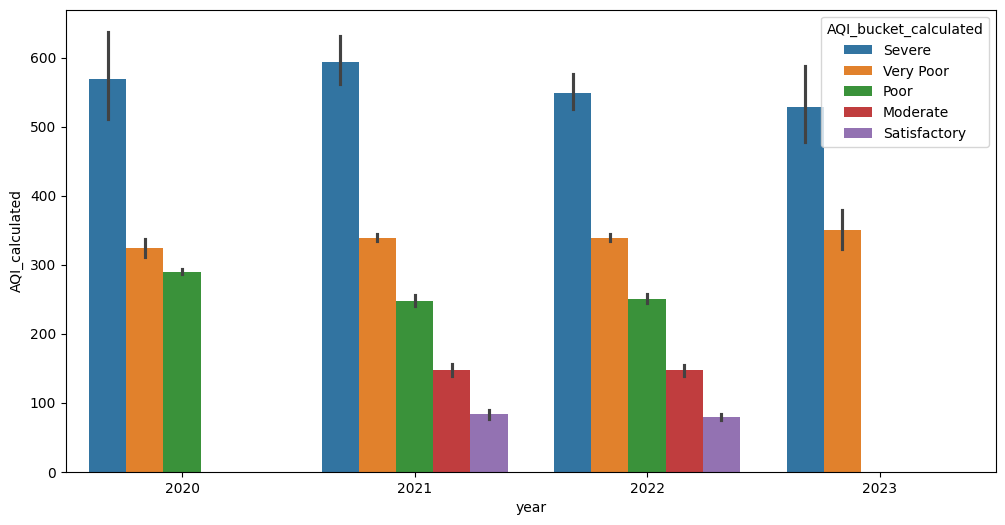

In [ ]:
AQIData['date'] = pd.to_datetime(AQIData['date'])
AQIData['year'] = AQIData['date'].dt.year
fig, ax= plt.subplots(figsize=(12,6))
sns.barplot(data=AQIData, x="year", y="AQI_calculated",hue ='AQI_bucket_calculated')

In [ ]:
AQIData1 = AQIData.drop(['PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NOx_SubIndex','NH3_SubIndex','CO_SubIndex','O3_SubIndex','Checks','year'],axis =1)

In [ ]:
AQIData1.head()

date  Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  \
0 2020-11-25    26.791304              82.430870   342.301739  405.037826   
1 2020-11-26    20.753333              65.158333   180.754167  226.001250   
2 2020-11-27    43.925000              41.485000   115.901667  143.952500   
3 2020-11-28    50.372500              41.515417   197.889167  234.861250   
4 2020-11-29    34.696250              77.785417   329.381667  404.049583   

   Ammonia,μg/m3  Carbon Monoxide,mg/m3   NOx,μg/m3  AQI_calculated  \
0      26.720435                   2.97  108.429130           471.0   
1      21.993750                   2.31   89.862500           347.0   
2      20.280000                   1.59   61.155833           286.0   
3      23.145000                   2.46   81.926250           360.0   
4      47.233750                   4.52  159.669167           461.0   

  AQI_bucket_calculated  
0                Severe  
1             Very Poor  
2                  Poor  
3             Very Poor  
4                Severe

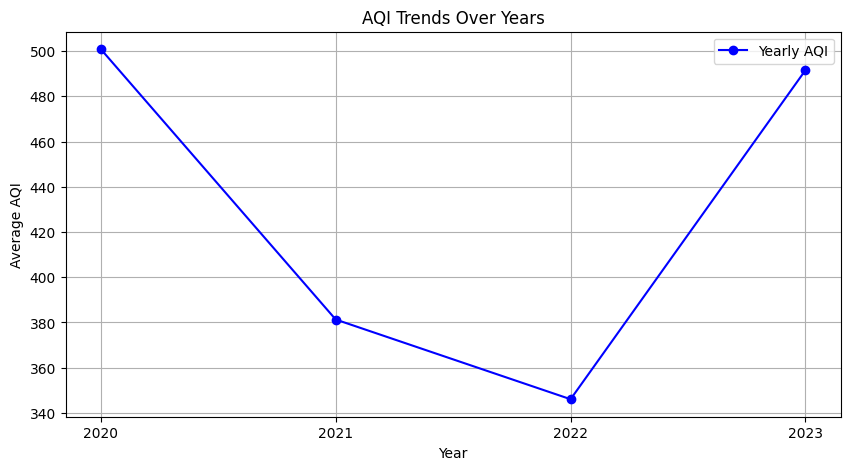

In [ ]:
# Convert the date column to datetime format
AQIData1['date'] = pd.to_datetime(AQIData1['date'])

# Extract year and month for trend analysis
AQIData1['year'] = AQIData1['date'].dt.year
AQIData1['month'] = AQIData1['date'].dt.month

# ---------------------------- AQI Trends Over Years ----------------------------
aqi_yearly = AQIData1.groupby('year')['AQI_calculated'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(aqi_yearly['year'], aqi_yearly['AQI_calculated'], marker='o', linestyle='-', color='b', label="Yearly AQI")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.title("AQI Trends Over Years")
plt.xticks(aqi_yearly['year'])
plt.grid(True)
plt.legend()
plt.show()

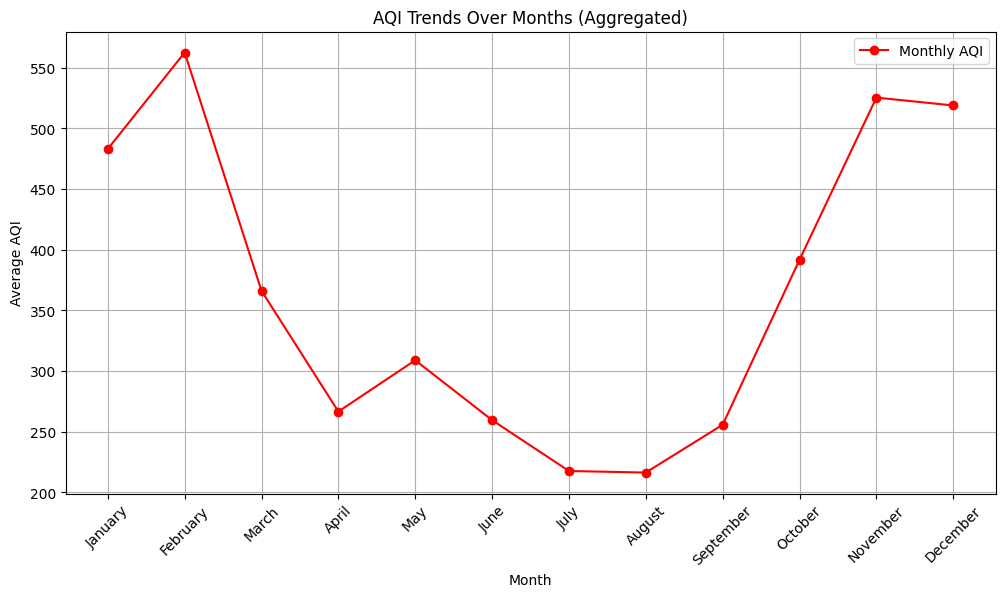

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date column to datetime format
AQIData1['date'] = pd.to_datetime(AQIData1['date'])

# Extract month name for trend analysis
AQIData1['month_name'] = AQIData1['date'].dt.strftime('%B')  # Converts to full month name

# Group by month and calculate mean AQI
aqi_trends_monthly = AQIData1.groupby('month_name')['AQI_calculated'].mean().reset_index()

# Define the correct order of months for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder DataFrame by month sequence
aqi_trends_monthly['month_name'] = pd.Categorical(aqi_trends_monthly['month_name'], categories=month_order, ordered=True)
aqi_trends_monthly = aqi_trends_monthly.sort_values('month_name')

# Plot AQI trends over months with month names
plt.figure(figsize=(12, 6))
plt.plot(aqi_trends_monthly['month_name'], aqi_trends_monthly['AQI_calculated'], marker='o', linestyle='-', color='red', label="Monthly AQI")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.title("AQI Trends Over Months (Aggregated)")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


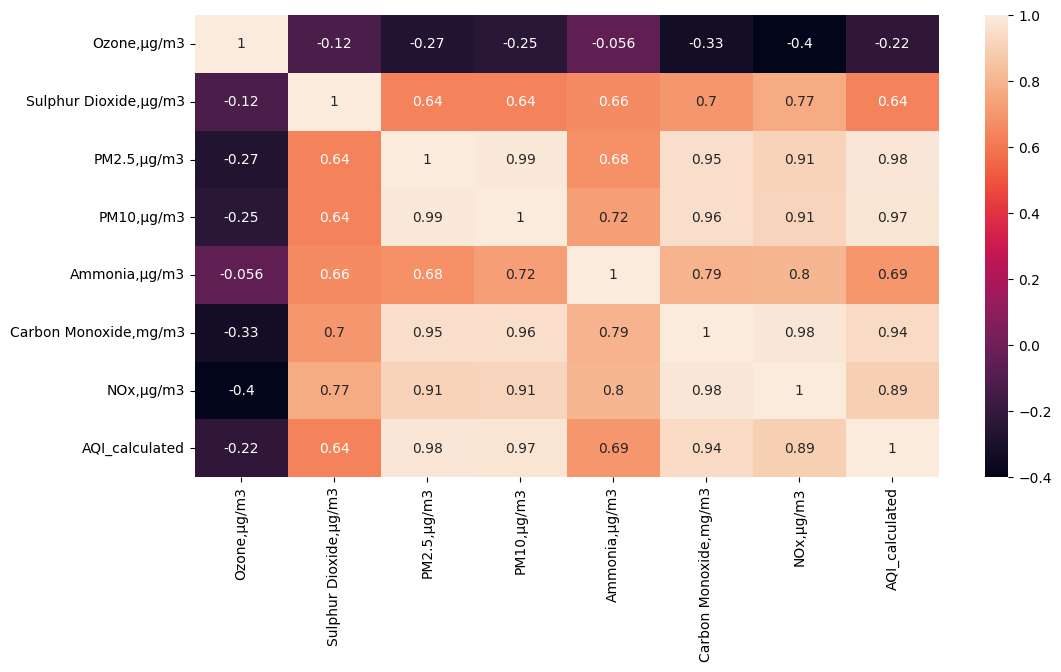

In [ ]:
#correlation matrix for AQI

AQIData2 = AQIData1.iloc[:,1:9]
corr_matrix = AQIData2.corr()
fig, ax= plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
AQIData2.head()

Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  Ammonia,μg/m3  \
0    26.791304              82.430870   342.301739  405.037826      26.720435   
1    20.753333              65.158333   180.754167  226.001250      21.993750   
2    43.925000              41.485000   115.901667  143.952500      20.280000   
3    50.372500              41.515417   197.889167  234.861250      23.145000   
4    34.696250              77.785417   329.381667  404.049583      47.233750   

   Carbon Monoxide,mg/m3   NOx,μg/m3  AQI_calculated  
0                   2.97  108.429130           471.0  
1                   2.31   89.862500           347.0  
2                   1.59   61.155833           286.0  
3                   2.46   81.926250           360.0  
4                   4.52  159.669167           461.0

In [ ]:
AQIData2.describe()

Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3   PM10,μg/m3  \
count   789.000000             789.000000   789.000000   789.000000   
mean     60.136006              66.436610   237.724729   299.394041   
std      38.680451              30.355025   180.529457   206.954238   
min       0.020000              17.021667    18.082917    29.643750   
25%      31.322917              45.756250   105.383750   146.344167   
50%      52.983333              60.340417   171.857083   233.813750   
75%      81.162917              79.611667   330.774167   402.863750   
max     260.295417             255.961667  1121.540833  1297.057917   

       Ammonia,μg/m3  Carbon Monoxide,mg/m3   NOx,μg/m3  AQI_calculated  
count     789.000000             789.000000  789.000000      789.000000  
mean       24.951067               2.917719   99.423226      374.026616  
std        15.157222               1.971249   66.989353      199.173866  
min         2.880000               0.440000   14.677917       57.000000  
25%        14.461667               1.430000   50.414167      251.000000  
50%        22.314167               2.280000   77.485000      340.000000  
75%        30.573750               4.050000  132.913750      462.000000  
max       100.212083              12.000000  445.375000     1484.000000

In [ ]:
plt.figure(figsize=(20,8))
sns.pairplot(AQIData1,hue = 'AQI_bucket_calculated')

Output hidden; open in https://colab.research.google.com to view.